In [1]:
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras.backend as K

from keras.models import Sequential
from keras.layers import Dense

from keras.models import Model
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Flatten
from keras import regularizers
from keras.layers.merge import concatenate
import keras.losses

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from scipy.stats import ks_2samp

os.chdir('../src/')
import ml_analysis_plotting

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
def  get_input_arrays(tree, features_list):
    array = np.transpose(tree.arrays(features_list, outputtype=tuple))
    print(array.shape)
    print(array[0])
    return array

In [3]:
#os.chdir('../data')
os.chdir('../data/KINNW_MC16e_nomSignal_mlpreped_temp')

In [4]:
f = uproot.open('out_proc_0_copy.root')
tree = f["features"]
tree.keys()

[b'top_pt',
 b'top_eta',
 b'top_phi',
 b'tbar_pt',
 b'tbar_eta',
 b'tbar_phi',
 b'lep_t_pt',
 b'lep_t_eta',
 b'lep_t_phi',
 b'lep_tbar_pt',
 b'lep_tbar_eta',
 b'lep_tbar_phi',
 b'nu_top_pt',
 b'nu_top_eta',
 b'nu_top_phi',
 b'nu_tbar_pt',
 b'nu_tbar_eta',
 b'nu_tbar_phi',
 b'b_pt',
 b'b_eta',
 b'b_phi',
 b'bbar_pt',
 b'bbar_eta',
 b'bbar_phi',
 b'ttbar_pt',
 b'ttbar_eta',
 b'ttbar_phi',
 b'top_m',
 b'tbar_m',
 b'lep_top_m',
 b'lep_tbar_m',
 b'nu_top_m',
 b'nu_tbar_m',
 b'b1_m',
 b'b2_m',
 b'ttbar_m',
 b'met',
 b'met_x',
 b'met_y',
 b'c_nn',
 b'c_rr',
 b'c_kk',
 b'c_rk',
 b'c_kr',
 b'c_nr',
 b'c_rn',
 b'c_nk',
 b'c_kn',
 b'c_nk_p_kn',
 b'c_nr_p_rn',
 b'c_rk_p_kr',
 b'c_nk_m_kn',
 b'c_nr_m_rn',
 b'c_rk_m_kr',
 b'b_kplus',
 b'b_nplus',
 b'b_rplus',
 b'b_kminus',
 b'b_nminus',
 b'b_rminus',
 b'lep_delta_phi',
 b'lep_delta_eta',
 b'top_delta_phi',
 b'top_delta_eta',
 b'lep_dphi_bypt',
 b'costheta_leps_a_k',
 b'costheta_leps_a_n',
 b'costheta_leps_a_r',
 b'costheta_leps_b_k',
 b'costheta_lep

In [5]:
## Get features

features_list = [
    # standard ATLAS reco stuff
    b'reco_met',
    b'reco_met_phi',
    b'reco_lep_p_pt',
    b'reco_lep_p_eta',
    b'reco_lep_p_phi',
    b'reco_lep_p_e',
    b'reco_lep_n_pt',
    b'reco_lep_n_eta',
    b'reco_lep_n_phi',
    b'reco_lep_n_e',
    b'reco_jet_0_pt',
    b'reco_jet_0_eta',
    b'reco_jet_0_phi',
    b'reco_jet_0_e',
    #b'reco_jet_0_bweight',
    b'reco_jet_1_pt',
    b'reco_jet_1_eta',
    b'reco_jet_1_phi',
    b'reco_jet_1_e',
    #b'reco_jet_1_bweight',
    b'reco_jet_2_pt',
    b'reco_jet_2_eta',
    b'reco_jet_2_phi',
    b'reco_jet_2_e',
    b'reco_lep_delta_phi',
    #b'reco_lep_delta_eta',
    b'reco_jet_delta_phi',
    #b'reco_jet_delta_eta',
    b'reco_jetlep_delta_phi_0',
    b'reco_jetlep_delta_phi_1',
    b'costheta_reco_leps_a_k',
    b'costheta_reco_leps_a_r',
    b'costheta_reco_leps_a_n',
    b'costheta_reco_leps_b_k',
    b'costheta_reco_leps_b_r',
    b'costheta_reco_leps_b_n',
    
    ## NW reco outputb'costheta_reco_leps_a_k',
    b'NW_top_pt',
    b'NW_top_eta',
    b'NW_top_phi',
    b'NW_tbar_pt',
    b'NW_tbar_eta',
    b'NW_tbar_phi',
    b'NW_top_m',
    b'NW_tbar_m',
    b'NW_b_pt',
    b'NW_b_eta',
    b'NW_b_phi',
    b'NW_bbar_pt',
    b'NW_bbar_eta',
    b'NW_bbar_phi',
    b'NW_b_e',
    b'NW_bbar_e',
    b'NW_nu_pt',
    b'NW_nu_eta',
    b'NW_nu_phi',
    b'NW_nubar_pt',
    b'NW_nubar_eta',
    b'NW_nubar_phi',
    b'NW_nu_e',
    b'NW_nubar_e',
    #b'NW_top_delta_phi', # <- not filled yet!
    #b'NW_top_delta_eta', # <- not filled yet!
    #b'NW_b_delta_phi',   # <- not filled yet!
    #b'NW_b_delta_eta',   # <- not filled yet!
    b'NW_weight',
    #b'NW_c_nn',  # < the NW result for the `target`!

    # KIN reco outputs
    b'KIN_top_pt',
    b'KIN_top_eta',
    b'KIN_top_phi',
    b'KIN_tbar_pt',
    b'KIN_tbar_eta',
    b'KIN_tbar_phi',
    b'KIN_top_m',
    b'KIN_tbar_m',
    b'KIN_b_pt',
    b'KIN_b_eta',
    b'KIN_b_phi',
    b'KIN_bbar_pt',
    b'KIN_bbar_eta',
    b'KIN_bbar_phi',
    b'KIN_b_e',
    b'KIN_bbar_e',
    b'KIN_nu_pt',
    b'KIN_nu_eta',
    b'KIN_nu_phi',
    b'KIN_nubar_pt',
    b'KIN_nubar_eta',
    b'KIN_nubar_phi',
    b'KIN_nu_e',
    b'KIN_nubar_e',
    #b'KIN_top_delta_phi', # <- not filled yet!
    #b'KIN_top_delta_eta', # <- not filled yet!
    #b'KIN_b_delta_phi',   # <- not filled yet!
    #b'KIN_b_delta_eta',   # <- not filled yet!
    b'KIN_prob', # <- similar to NW weight
    #b'KIN_c_nn', # <- KIN result for the `target` variable
]

In [6]:
# Get target
NWKIN = tree.array("NW_truth_topdeltaR")
#NWKIN = tree.array("diff_NWKIN_c_nn")
#h_NWKIN, a_NWKIN, _NWKIN = plt.hist(NWKIN, bins=200)
#plt.show()
NWtru = tree.array("diff_NWtruth_c_nn")
#h_NWtru, a_NWtru, _NWtru = plt.hist(NWtru, bins=200)
#plt.show()
KINtru = tree.array("diff_KINtruth_c_nn")
#h_KINtru, a_KINtru, _KINtru = plt.hist(KINtru, bins=200)
#plt.show()


In [7]:
#KIN = np.zeros(len(np.where(target < 1.5)[0]))
#NW  = np.ones(len(np.where(target > 1.5)[0]))
#SIM = np.zeros(len(np.where(abs(NWKIN) <  0.3)[0]))
#DIF = np.ones( len(np.where(abs(NWKIN) >= 0.3)[0]))
#big_dif  = np.where(abs(NWKIN) > 0.3, 1, 0)
big_dif  = np.where(abs(NWKIN) > 1, 1, 0)
#kin_best = np.where(abs(t_KINtru) < abs(t_NWtru), 1, 0)
#labels = np.multiply(big_dif, kin_best)
labels = big_dif
print(len(labels))
print(labels[:20])
#print(abs(t_NWKIN[:20]))

# Check numbers
#print(target.shape)
#print(len(KIN))
#print(KIN[:10])
#print(len(NW))
#print(NW[:10])

76999
[1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1]


(76999, 82)
[ 7.04442031e+04  1.97376204e+00  7.32048281e+04 -2.58735389e-01
 -1.16389930e+00  7.56689141e+04  4.40991406e+04 -2.24167752e+00
 -2.21246004e+00  2.09810094e+05  5.11211914e+04 -3.97971272e-01
 -2.24426079e+00  5.57083594e+04  4.16313828e+04 -5.26064336e-01
  1.06392336e+00  4.78393008e+04  3.50282070e+04  4.95823473e-01
  7.02036977e-01  3.97163633e+04  5.23462457e+00  2.97500116e+00
  6.25138456e+00  2.22782266e+00  3.48888839e-01 -4.18595164e-01
 -8.38483552e-01 -3.48888839e-01  4.18595164e-01  8.38483552e-01
  7.54347813e+04 -5.17109521e-02 -4.77359116e-01  8.75067109e+04
 -2.26317406e+00 -2.83609891e+00  1.71500000e+05  1.73000000e+05
  5.45543008e+04 -5.26064336e-01  1.06392336e+00  4.56552266e+04
 -3.97971272e-01 -2.24426079e+00  6.26892344e+04  4.97519258e+04
  1.90646367e+04  1.60000002e+00 -9.17833567e-01  5.30639414e+04
 -2.00000000e+00  2.14039230e+00  4.91384200e+07  1.99636922e+05
  6.52954122e-03  6.20062930e+04 -6.86000049e-01  2.60091007e-01
  7.55591328e

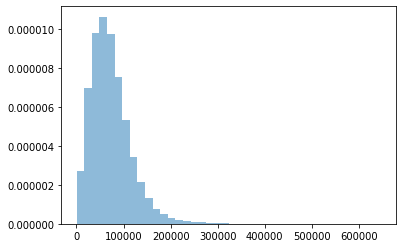

b'reco_met_phi'
[ 1.97376204  0.20956767 -0.14693783  1.6379689   0.71866649  0.40140578
  0.47536084 -0.1475895  -2.72426796  0.18630156 -2.21753311 -1.44509363
  2.16546106  2.62482691 -2.78089809  1.07133913 -2.6246016  -2.42604923
 -1.34498954  0.15153895]


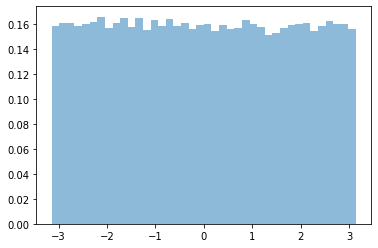

b'reco_lep_p_pt'
[ 73204.828125    86488.7265625   26266.01367188  32821.5859375
 204286.796875    50013.40625     38218.5390625   70525.4921875
  26495.66015625  79661.5625      83259.71875     83368.34375
  33950.5546875   76923.6796875   62229.82421875  65396.265625
  40892.03515625  76037.1171875   45849.4453125   49140.890625  ]


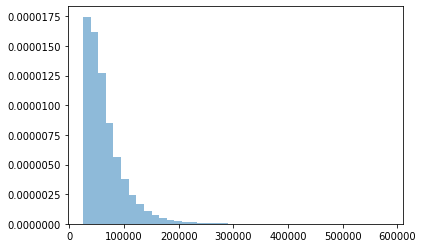

b'reco_lep_p_eta'
[-0.25873539 -1.89779687  0.11739454 -0.72035635  0.2664986   1.16514027
  0.71674883  0.42121539 -1.09605968 -0.37289137 -1.36438143 -1.15014577
  0.79597533 -1.71717513  0.4728252  -1.45330179 -0.23287651  0.46291441
  0.27169111  0.31052354]


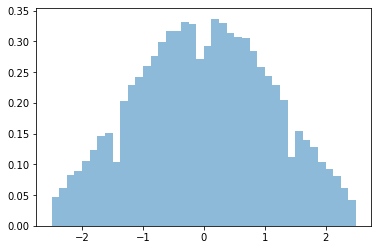

b'reco_lep_p_phi'
[-1.1638993  -0.81611228  2.07569623  2.25258756  1.64694595  3.10763121
 -0.24804939 -0.47829711 -2.32918811 -2.91455531  1.46832991 -1.22183859
  0.35592276 -0.62752849 -2.00539851 -0.05688481  1.83550358  2.34021282
  2.85627723 -2.48346019]


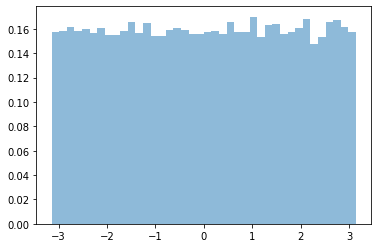

b'reco_lep_p_e'
[ 75668.9140625  294973.21875     26447.42578125  41712.171875
 211584.234375    87979.875       48463.171875    76875.015625
  44069.3984375   85264.4921875  173548.265625   144862.703125
  45285.67578125 221092.0625      69316.6328125  147501.671875
  42005.87109375  84330.6953125   47552.2109375   51529.30078125]


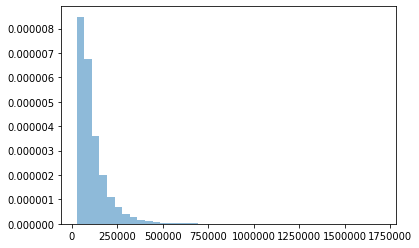

b'reco_lep_n_pt'
[ 44099.140625    42117.3203125   76012.875       88174.71875
 142237.296875    27870.1015625   28965.43359375  35897.46875
  50360.95703125  57538.94921875  53379.5546875   34158.55078125
  72813.9140625   33958.27734375  31694.42382812  51322.23046875
  34791.58203125  40236.02734375  35236.64453125  27525.1484375 ]


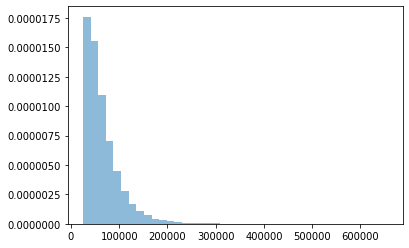

b'reco_lep_n_eta'
[-2.24167752 -0.78433174 -1.43129408  1.3370142  -0.44239441  0.84688294
  1.2167927   0.12732685  1.87158453  0.39241776  0.45442569  0.5646044
 -0.27744791  0.96782649 -1.85561299 -0.32943529 -1.01683736  1.24985683
 -1.57231903  1.48975599]


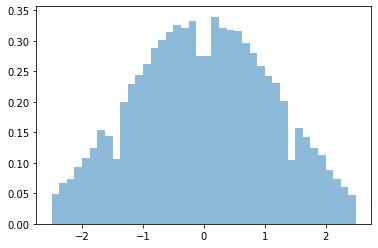

b'reco_lep_n_phi'
[-2.21246004 -2.59589577 -1.44471419 -0.08949932 -0.96701497  2.49056101
  0.38314092 -0.0188891   1.38709426 -0.50241601 -0.30814308  1.11471426
 -0.30925635 -2.5691402  -0.60268104  2.40061092  1.34755325  0.52526253
 -1.8361311   0.24551453]


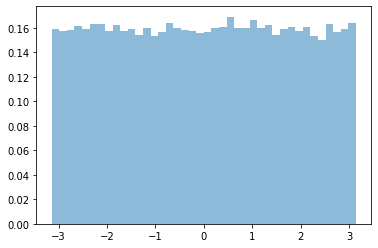

b'reco_lep_n_e'
[209810.09375     55750.         168106.671875   179448.171875
 156384.65625     38476.41796875  53188.171875    36189.00390625
 167512.25        62026.35546875  58986.66015625  39749.3671875
  75634.4453125   51143.2890625  103830.53125     54132.44921875
  54382.2890625   75973.5234375   88538.609375    64153.5078125 ]


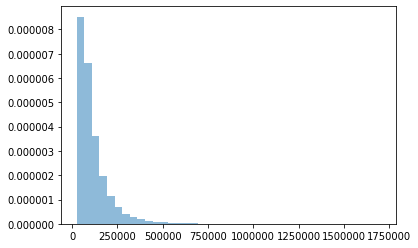

b'reco_jet_0_pt'
[ 51121.19140625 258897.984375   130453.09375     63814.171875
 103515.3671875  130287.9453125  117815.765625    64934.75
  55469.77734375  70787.7421875   97265.1875      49064.8984375
  55925.84765625 102942.96875    115939.96875    259770.875
  98341.265625    78181.375      135800.421875    50548.703125  ]


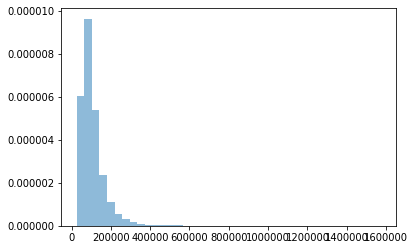

b'reco_jet_0_eta'
[-0.39797127 -0.80968362  0.78669751  1.266482   -0.18767986 -1.98810029
  0.90656292  0.92954451  1.95474494 -0.78450817 -0.20654376 -0.81638306
 -0.88488579 -0.74311447 -0.71187931 -0.43206665 -0.30674934  0.58644164
  0.81512952  1.06283581]


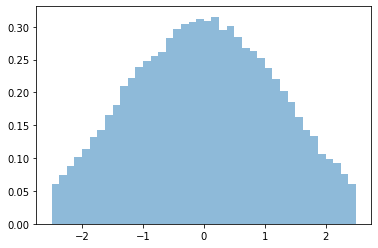

b'reco_jet_0_phi'
[-2.24426079 -3.01389289  2.19042802 -2.2066927  -1.83301675 -0.22174084
 -2.74967194  2.34554696  0.23802719  0.60949868 -2.6100893   2.32302809
 -2.45866299 -0.74179798  0.68441194 -2.66902876 -0.25176862  0.59600294
 -2.0846343   2.02846909]


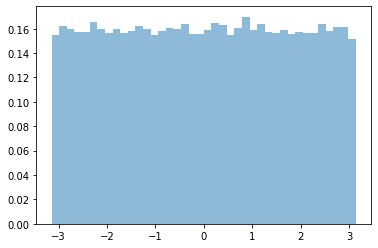

b'reco_jet_0_e'
[ 55708.359375  349164.625     173628.828125  122455.1328125
 105942.109375  484737.03125   170049.203125   95809.375
 200216.640625   93912.265625  100059.015625   66758.5546875
  79747.5625    133619.890625  147438.25      285155.96875
 104102.875      92355.71875   183814.921875   82219.0078125]


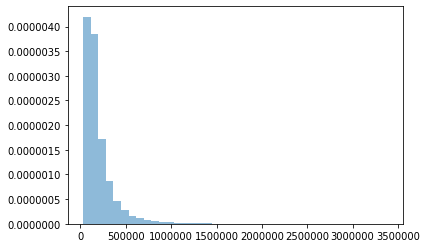

b'reco_jet_1_pt'
[ 41631.3828125  132379.125       39960.44140625  42838.21875
  74089.2734375  109530.234375    73817.59375     40852.9296875
  51225.25390625  37857.2109375   35138.3046875   25781.68554688
  38402.69140625  57012.0625      43407.12890625  92707.4375
  50180.48046875  57423.97265625 109393.265625    27838.26757812]


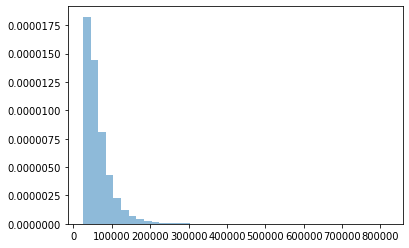

b'reco_jet_1_eta'
[-0.52606434 -1.93662786 -0.66325641  2.33697724 -0.20749924 -0.34123001
  0.53560948  1.65133584 -0.72407758  1.56703579 -2.25492978 -1.52142465
 -0.86506438  0.34094685  1.45773661  0.00299866 -0.0504509   0.38505235
  1.62409198  0.15468353]


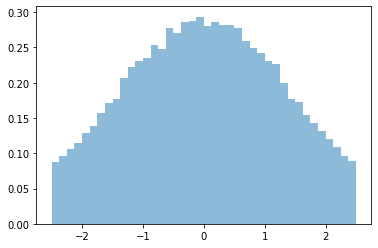

b'reco_jet_1_phi'
[ 1.06392336  0.21053742 -2.47760439 -2.316787    2.68371201  2.17698932
 -1.10158455 -2.56100512  0.24465972 -1.43318307 -0.61051542  1.65287447
  2.74900723  1.19157326 -2.89443731  0.38833991  2.50365186 -1.86917174
  1.85989845 -0.93848711]


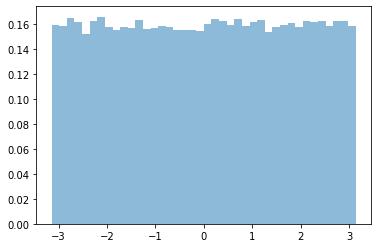

b'reco_jet_1_e'
[ 47839.30078125 468729.53125     49670.65234375 223799.921875
  76693.5        116475.9296875   85205.140625   110721.953125
  65829.3046875   94762.2578125  169488.828125    62038.3515625
  54420.171875    61049.140625    98796.5078125   93197.609375
  50838.10546875  62517.640625   288394.6875      28792.47070312]


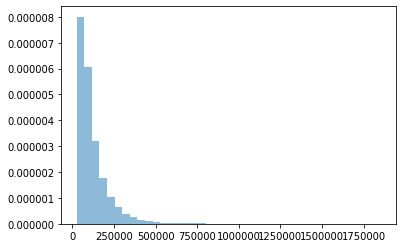

b'reco_jet_2_pt'
[ 35028.20703125 106912.15625    106912.15625    106912.15625
 106912.15625     50298.6640625   70473.8125      26687.9453125
  25187.57421875  35984.8203125   35984.8203125   35984.8203125
  35984.8203125   35984.8203125   30194.078125    85632.625
  40588.74609375  40588.74609375  76012.0703125   27519.98242188]


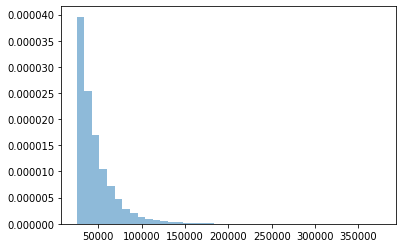

b'reco_jet_2_eta'
[ 0.49582347 -1.69313335 -1.69313335 -1.69313335 -1.69313335  1.85196829
  1.30771899  1.68809712  2.44831896  0.16222113  0.16222113  0.16222113
  0.16222113  0.16222113  0.64397305 -0.64932019 -0.67088962 -0.67088962
 -1.52531207  1.816733  ]


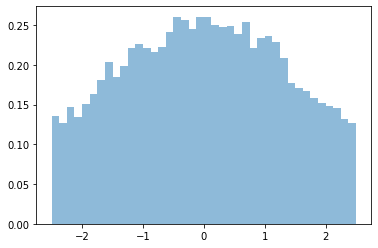

b'reco_jet_2_phi'
[ 0.70203698  0.83397043  0.83397043  0.83397043  0.83397043 -2.67909765
  1.36338115 -3.11555123  0.02389514 -3.10297322 -3.10297322 -3.10297322
 -3.10297322 -3.10297322  0.23972316 -0.34733576 -0.75786018 -0.75786018
 -0.29618037 -2.54256248]


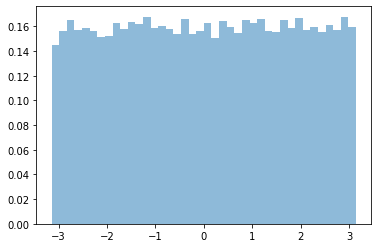

b'reco_jet_2_e'
[ 39716.36328125 300694.6875     300694.6875     300694.6875
 300694.6875     164279.46875    140092.703125    74907.3203125
 146896.875       37268.0703125   37268.0703125   37268.0703125
  37268.0703125   37268.0703125   37176.53125    104905.9375
  50513.390625    50513.390625   183213.359375    87119.2421875 ]


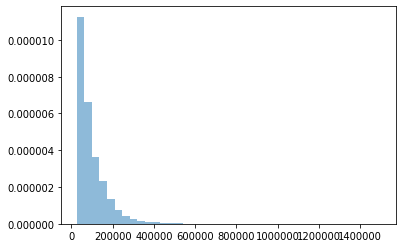

b'reco_lep_delta_phi'
[5.23462457 1.77978349 2.76277489 3.94109843 2.61396092 0.6170702
 5.65199499 5.8237773  3.71628237 2.4121393  1.77647299 3.94663245
 5.6180062  4.3415736  1.40271747 2.45749573 0.48795033 1.81495029
 1.59077698 3.55421059]


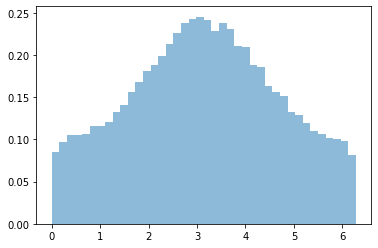

b'reco_jet_delta_phi'
[2.97500116 3.058755   4.66803241 0.11009431 1.76645655 3.88445515
 4.63509792 4.90655208 6.27655277 2.04268175 4.28361142 0.67015362
 1.0755151  4.34981406 3.57884926 3.22581664 3.52776483 2.46517467
 2.33865255 2.9669562 ]


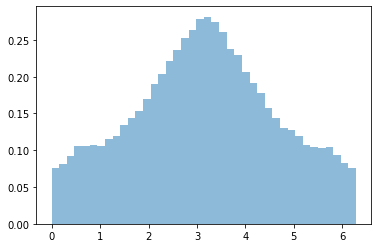

b'reco_jetlep_delta_phi_0'
[6.25138456 4.0854047  3.63514221 4.16599194 2.8032226  2.95381326
 3.78156276 2.82384408 5.13411823 1.11191469 2.2047661  3.54486668
 4.13377867 1.82734221 1.28709298 1.21354562 4.19591311 4.53897542
 6.0346821  4.51192927]


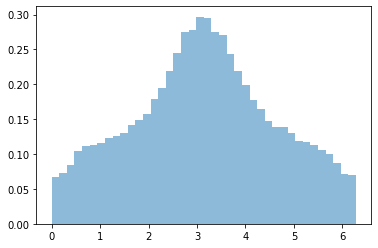

b'reco_jetlep_delta_phi_1'
[2.22782266 2.80643319 1.72988469 1.71381075 3.65072697 5.96961362
 4.79845983 3.7410693  2.57384783 1.48137224 5.98081297 0.5381602
 2.39308447 1.81910175 5.39414651 0.44522471 1.1560986  3.88875103
 5.28680653 5.09918367]


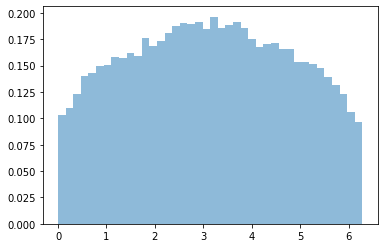

b'costheta_reco_leps_a_k'
[ 0.34888884  0.5804331  -0.52146396 -0.80700084 -0.86695112  0.90303137
  0.862432    0.86606179 -0.91382867 -0.77929438 -0.46202804 -0.76098055
  0.38883043 -0.78474472 -0.37361156 -0.04071256  0.72592875  0.25139441
 -0.25095743 -0.10301747]


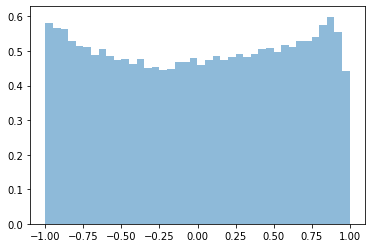

b'costheta_reco_leps_a_r'
[-0.41859516  0.34195372  0.77017822  0.17447283 -0.19668819 -0.09410197
  0.39107138 -0.23763693  0.24106385 -0.07060438 -0.04198905  0.19278217
 -0.79668519 -0.5282228  -0.27747432  0.9590804   0.61892618  0.82018789
 -0.08787091  0.97968615]


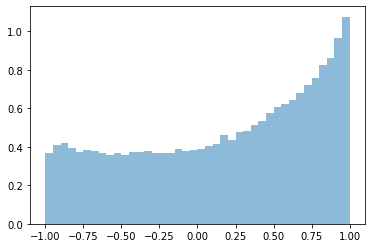

b'costheta_reco_leps_a_n'
[-0.83848355  0.73902981  0.36728851  0.56418868 -0.45794051 -0.41914099
  0.32136307  0.43984732  0.32681094 -0.62266789  0.88587076 -0.61947045
 -0.46271331  0.32427828  0.88511152  0.28019148  0.29992971 -0.51389948
  0.96400159  0.17205365]


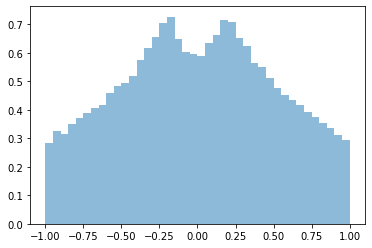

b'costheta_reco_leps_b_k'
[-0.34888884 -0.5804331   0.52146396  0.80700084  0.86695112 -0.90303137
 -0.862432   -0.86606179  0.91382867  0.77929438  0.46202804  0.76098055
 -0.38883043  0.78474472  0.37361156  0.04071256 -0.72592875 -0.25139441
  0.25095743  0.10301747]


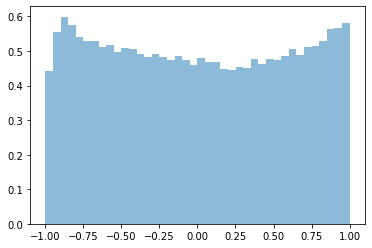

b'costheta_reco_leps_b_r'
[ 0.41859516 -0.34195372 -0.77017822 -0.17447283  0.19668819  0.09410197
 -0.39107138  0.23763693 -0.24106385  0.07060438  0.04198905 -0.19278217
  0.79668519  0.5282228   0.27747432 -0.9590804  -0.61892618 -0.82018789
  0.08787091 -0.97968615]


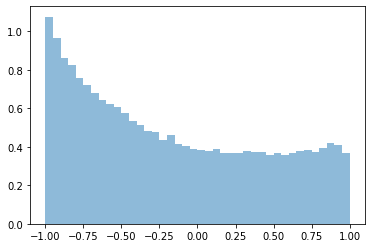

b'costheta_reco_leps_b_n'
[ 0.83848355 -0.73902981 -0.36728851 -0.56418868  0.45794051  0.41914099
 -0.32136307 -0.43984732 -0.32681094  0.62266789 -0.88587076  0.61947045
  0.46271331 -0.32427828 -0.88511152 -0.28019148 -0.29992971  0.51389948
 -0.96400159 -0.17205365]


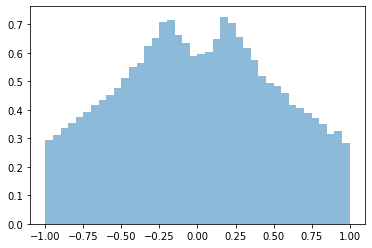

b'NW_top_pt'
[ 75434.78125    222007.6875     166058.9375     134918.9375
 265819.90625    265819.90625    100651.015625    95092.7265625
 180088.453125    26137.203125    76379.1953125  119404.8515625
 118806.5390625  164145.484375   120976.796875   177775.234375
  28601.10742187 109975.7734375  132123.796875    71092.0390625 ]


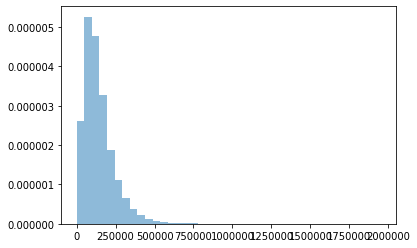

b'NW_top_eta'
[-0.05171095 -2.30330849  1.20759332  0.81778651  0.28012842  0.28012842
  0.78041679  0.75544173 -0.54062849 -2.2564218  -2.19274926 -1.22817838
  0.59378481 -1.65099025  0.03360496 -1.63037968  0.0995316   0.27285665
  0.79390407  1.3561362 ]


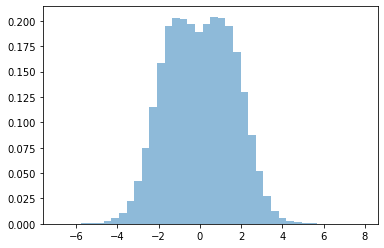

b'NW_top_phi'
[-0.47735912 -0.14379257  1.90911734 -3.1109097   1.91635168  1.91635168
  0.05051104  0.45399785 -1.42203259  1.87729466  1.22486937 -1.78204417
  1.89825785 -0.53470558 -1.85902011 -0.43795928 -3.07314229 -3.07874608
 -2.1672442  -1.96414542]


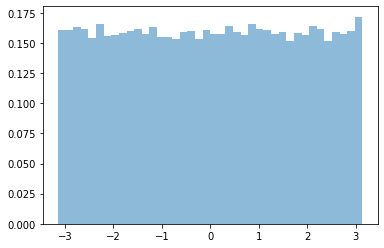

b'NW_tbar_pt'
[ 87506.7109375  87575.75      150170.625     165659.890625
 264748.34375   264748.34375   125299.921875   79644.046875
 185090.40625   101585.03125   124766.0859375  57770.296875
 108031.1171875 234949.96875   118714.9140625 201932.109375
  83936.375     110582.4765625 114691.375      98932.2890625]


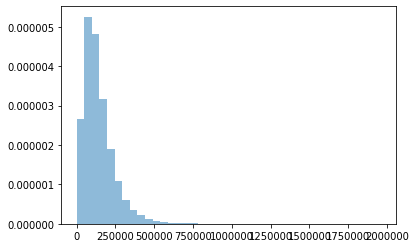

b'NW_tbar_eta'
[-2.26317406 -2.05517054 -1.68566513  1.92800081 -0.56722569 -0.56722569
  1.19261992  0.82270479  2.20400548  0.79342413 -0.0447035   0.12784731
 -0.42499417  0.73392487 -1.57854891 -0.20487301 -1.29160285  1.85997498
 -1.46889019  2.62285638]


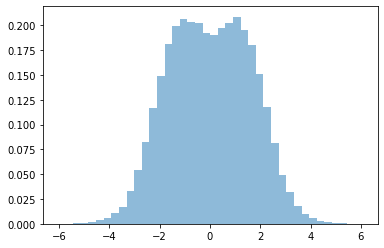

b'NW_tbar_phi'
[-2.83609891  0.6826812  -1.22920823  0.28121242 -1.3260268  -1.3260268
 -2.28663874 -1.78557563  1.9440577  -0.98500741 -1.87732637  0.08627006
 -1.26050246  2.77654004  0.8452937   1.20402408 -0.38186693  0.25855473
 -1.06526005  1.00590694]


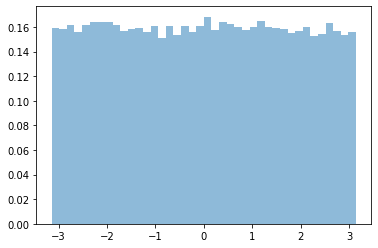

b'NW_top_m'
[171500. 172500. 171500. 173500. 171000. 171000. 171000. 172500. 173500.
 171000. 174000. 172500. 174000. 173500. 171500. 171500. 174000. 174000.
 172500. 173500.]


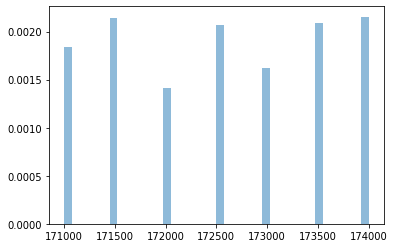

b'NW_tbar_m'
[173000. 172500. 171500. 171000. 173000. 173000. 172500. 171500. 172500.
 173000. 171000. 173000. 173500. 171000. 172500. 174000. 172000. 172000.
 174000. 171000.]


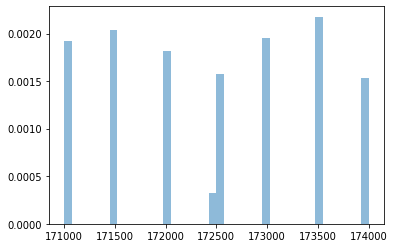

b'NW_b_pt'
[ 54554.30078125 153502.71875    140431.890625    59585.16015625
  71489.6796875   71489.6796875   71429.46875     45205.65625
  41770.2890625   68303.9921875   40261.921875    41635.46875
  38402.69140625  97981.4375      36358.87109375  86587.5390625
  49614.63671875  68369.359375   121754.4375      46894.265625  ]


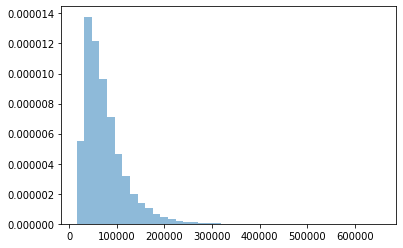

b'NW_b_eta'
[-0.52606434 -1.93662786  0.78669751  1.266482   -0.20749924 -0.20749924
  0.53560948  0.92954451 -0.72407758 -0.78450817 -2.25492978 -0.81638306
 -0.86506438 -0.74311447  0.64397305 -0.64932019 -0.67088962  0.38505235
  0.81512952  1.06283581]


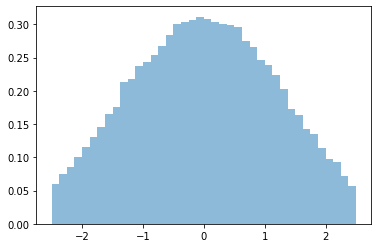

b'NW_b_phi'
[ 1.06392336  0.21053742  2.19042802 -2.2066927   2.68371201  2.68371201
 -1.10158455  2.34554696  0.24465972  0.60949868 -0.61051542  2.32302809
  2.74900723 -0.74179798  0.23972316 -0.34733576 -0.75786018 -1.86917174
 -2.0846343   2.02846909]


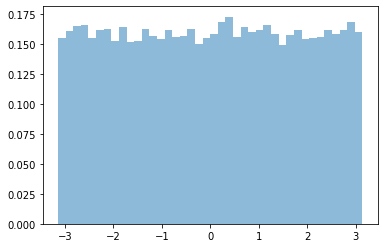

b'NW_bbar_pt'
[ 45655.2265625   96688.125       48825.57421875  25266.30664062
 117820.3515625  117820.3515625  113516.1875      37268.79296875
  32548.49804688  46358.49609375  92679.34375     25807.0625
  55925.84765625  36966.9921875  107627.0703125   90026.7578125
  94113.4765625   74400.140625    74926.90625     17234.8671875 ]


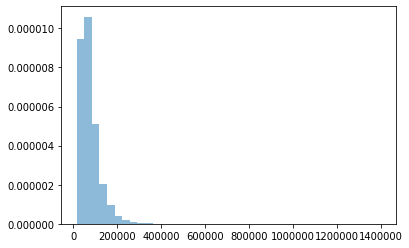

b'NW_bbar_eta'
[-0.39797127 -1.69313335 -0.66325641  2.33697724 -0.18767986 -0.18767986
  0.90656292  1.65133584  2.44831896  1.56703579 -0.20654376 -1.52142465
 -0.88488579  0.34094685 -0.71187931  0.00299866 -0.30674934  0.58644164
 -1.52531207  0.15468353]


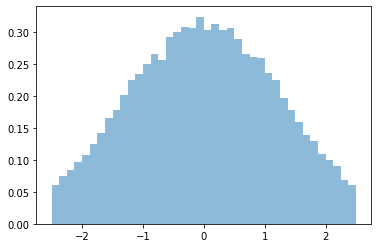

b'NW_bbar_phi'
[-2.24426079  0.83397043 -2.47760439 -2.316787   -1.83301675 -1.83301675
 -2.74967194 -2.56100512  0.02389514 -1.43318307 -2.6100893   1.65287447
 -2.45866299  1.19157326  0.68441194  0.38833991 -0.25176862  0.59600294
 -0.29618037 -0.93848711]


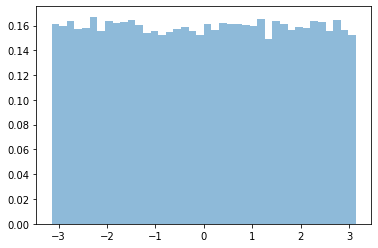

b'NW_b_e'
[ 62689.234375   543524.1875     186910.265625   114339.9375
  74002.53125     74002.53125     82448.609375    66699.65625
  53678.78125     90617.140625   194202.484375    56649.94140625
  54420.171875   127179.8203125   44766.94921875 106075.765625
  61746.26953125  74433.9140625  164802.75        76274.953125  ]


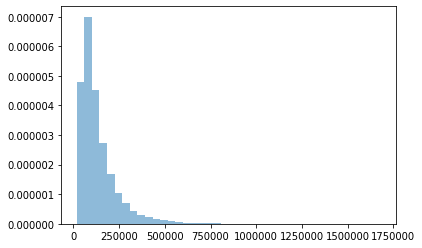

b'NW_bbar_e'
[ 49751.92578125 271939.1875      60689.97265625 131998.90625
 120582.4453125  120582.4453125  163843.40625    101008.03125
 189826.65625    116042.2421875   95341.453125    62099.41796875
  79747.5625      39584.66015625 136866.9375      90502.7578125
  99627.3828125   87888.9375     180597.765625    17825.62304688]


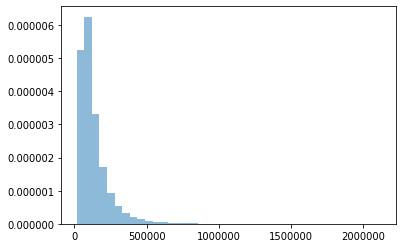

b'NW_nu_pt'
[ 19064.63671875  10970.54785156  43748.94921875  80954.765625
  18616.10742188  18616.10742188  84208.9765625   68774.53125
 169129.453125    14228.80078125  19771.40625     73279.3203125
  92770.3515625   28365.76367188  80939.3515625   44771.4296875
  54388.10546875  37169.07421875  33741.41015625  84163.2890625 ]


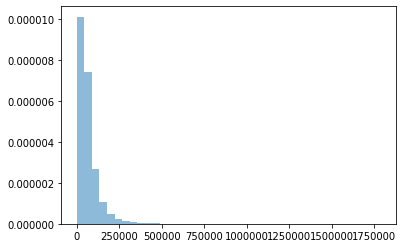

b'NW_nu_eta'
[ 1.60000002e+00 -4.00000000e+00  1.79999995e+00  6.00000024e-01
  1.39999998e+00  1.39999998e+00  2.00000003e-01  2.22044605e-15
 -2.00000003e-01 -1.60000002e+00  2.00000003e-01 -4.00000006e-01
  8.00000012e-01 -2.20000005e+00 -6.00000024e-01 -2.40000010e+00
  8.00000012e-01 -8.00000012e-01 -2.00000003e-01  6.00000024e-01]


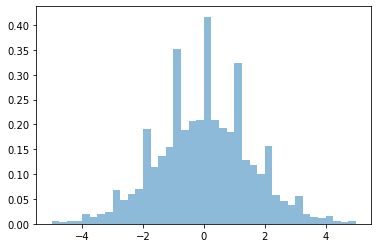

b'NW_nu_phi'
[-0.91783357 -0.08854534  0.47496188  2.91340256  2.173908    2.173908
  1.19011104  0.65500337 -1.54476917  0.26710403  2.47927022 -1.9204278
  1.95289993  1.31411362 -2.13855362 -1.23927879 -3.00655961  3.03892779
 -0.50532168 -1.17642868]


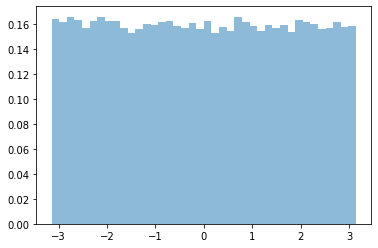

b'NW_nubar_pt'
[ 53063.94140625  39495.08984375  87113.953125   114297.8984375
  30095.72460938  30095.72460938  62337.98046875  60753.24609375
 163897.125       11048.93457031  56678.9765625   68079.578125
  46049.3359375  215650.96875     49518.7890625  122981.9453125
  46704.76171875  35274.74609375  45103.59375     92177.421875  ]


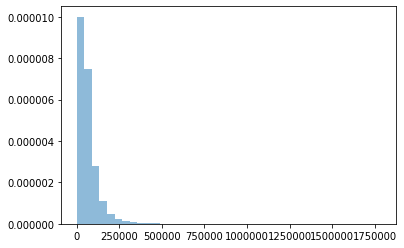

b'NW_nubar_eta'
[-2.         -1.         -1.60000002  1.60000002 -1.60000002 -1.60000002
  0.40000001 -0.40000001  1.79999995 -2.         -0.2         0.60000002
  0.60000002  0.60000002 -1.39999998 -0.2        -1.20000005  2.5999999
  0.2         2.5999999 ]


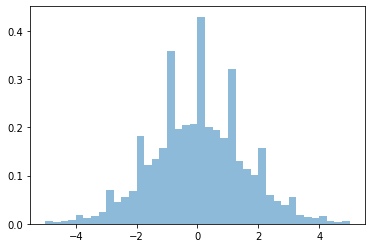

b'NW_nubar_phi'
[ 2.1403923   0.14215942 -0.42800537  0.68598807 -1.08333564 -1.08333564
 -1.64040852 -1.93629253  2.30058432 -1.62680483 -1.72471833 -0.85585797
 -1.41734648  2.82102513  2.23357606  1.34915948 -2.03024197 -1.26592076
 -1.72258162  1.39557517]


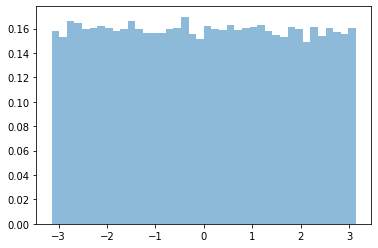

b'NW_nu_e'
[4.91384200e+07 2.99586272e+08 1.35948688e+08 9.59690560e+07
 4.00413560e+07 4.00413560e+07 8.58987760e+07 6.87745280e+07
 1.72523328e+08 3.66742280e+07 2.01681540e+07 7.92202480e+07
 1.24074304e+08 1.29572208e+08 9.59507840e+07 2.48792464e+08
 7.27405520e+07 4.97112200e+07 3.44184920e+07 9.97726480e+07]


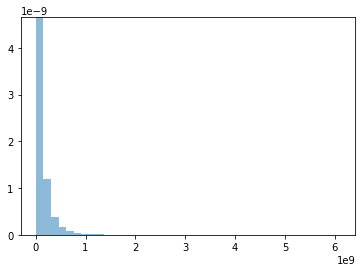

b'NW_nubar_e'
[199636.921875    60944.109375   224533.125      294598.78125
  77570.65625     77570.65625     67391.8671875   65678.65625
 509305.90625     41568.25390625  57816.33984375  80705.96875
  54589.88671875 255646.71875    106509.8828125  125449.7890625
  84566.234375   238774.96875     46008.67578125 623949.5       ]


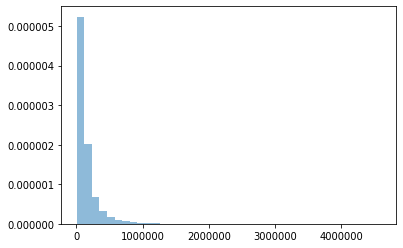

b'NW_weight'
[ 6.52954122e-03  9.99243498e-01  9.92526054e-01  9.92583573e-01
  9.60457265e-01 -9.99000000e+02  9.98761356e-01  9.82439697e-01
  9.96599913e-01  9.93327320e-01  9.99405205e-01  9.95192230e-01
  9.99876559e-01  9.85195160e-01  9.60010409e-01  9.99965489e-01
  9.99670923e-01  9.99701023e-01  9.99965727e-01  9.53456342e-01]


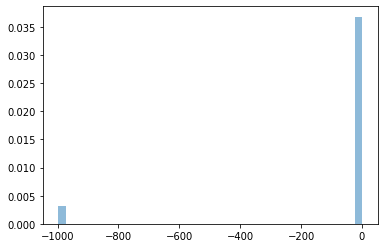

b'KIN_top_pt'
[ 62006.29296875 196723.6875     177552.5625      80645.359375
 282219.4375     171726.46875     88761.25        82114.421875
  85585.4140625  116210.1328125   69084.609375   161410.984375
  56188.1875     184884.484375   156783.203125   166336.40625
  96440.2890625   95199.5703125  164220.984375   109107.96875   ]


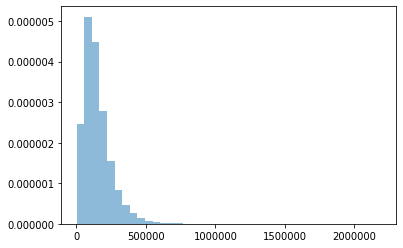

b'KIN_top_eta'
[-0.68600005 -2.01860881  1.13183355  1.18174708  0.27338928  0.25091404
 -0.65804976  0.96290046 -0.36319262  0.56678063 -2.48239636 -1.07113099
  1.15682602 -1.45095932  0.01204944 -1.5405426  -1.44826651  1.32148349
  0.71079427  0.39944634]


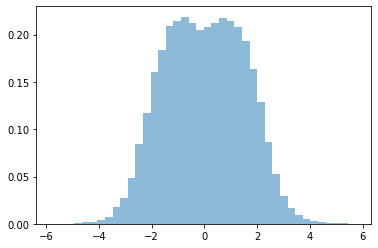

b'KIN_top_phi'
[ 0.26009101 -0.22049078  1.74530935  2.64926362  1.95165074  2.25285816
 -0.12814741  0.05724907 -1.89347684 -2.22254467  0.60299742 -1.08145332
  2.60747838 -0.56826109 -2.02775788  0.15292484  2.35655284  2.96161675
 -2.15609169 -2.86298823]


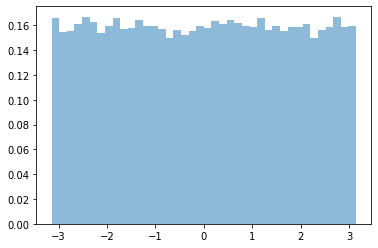

b'KIN_tbar_pt'
[ 75559.1328125 100298.0234375 171855.609375   67195.3828125
 251941.515625   41837.1875    135563.140625   69552.640625
  70142.1484375 131642.6875    103624.1328125  66438.8125
  47095.640625  194671.25      167826.078125  116043.0703125
 108248.953125  107579.0625    115180.2265625 107419.2421875]


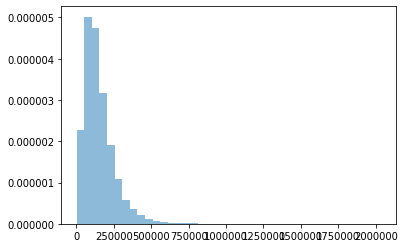

b'KIN_tbar_eta'
[-2.1812458  -2.02872467 -1.878286    2.37855029 -0.59263265  2.12972522
  1.25575197  1.00364423  2.75409555  0.05074989  0.52287579  0.66884863
 -1.63514388  0.79306322 -1.47068048 -0.70506865 -0.48013213  1.8279916
 -1.46983171  1.01403999]


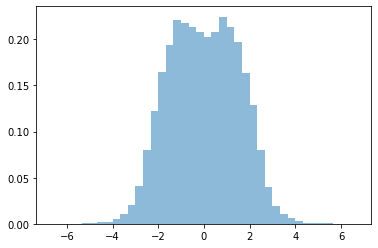

b'KIN_tbar_phi'
[-2.5574863   0.81164026 -1.28173685 -0.17239554 -1.24030674 -2.35975528
  3.06764913 -2.00093722  1.42548966  0.40982044 -2.01927161  2.50008154
 -0.41169831  2.56735635  0.79668766  0.8960346  -0.06251524  0.27716714
 -1.01964164  0.42351565]


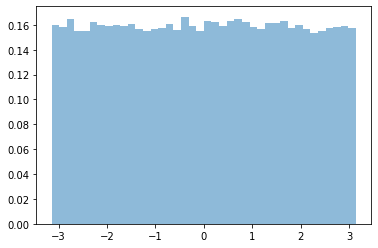

b'KIN_top_m'
[172500.046875 172500.21875  172500.       172500.       172500.
 172500.       172500.       172500.015625 172500.       172500.03125
 172500.09375  172500.       172500.03125  172500.03125  172500.046875
 172500.046875 172500.015625 172500.       172500.046875 172500.      ]


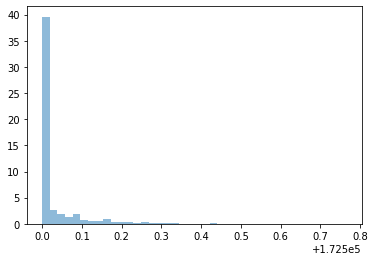

b'KIN_tbar_m'
[172500.015625 172500.03125  172500.       172500.       172500.
 172500.015625 172500.       172500.       172500.015625 172500.015625
 172500.       172500.       172500.078125 172500.03125  172500.
 172500.109375 172500.03125  172500.       172500.15625  172500.      ]


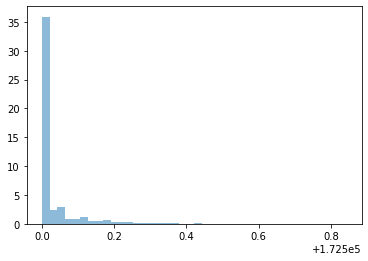

b'KIN_b_pt'
[ 41631.3828125  132379.125      130453.09375     63814.171875
  74089.2734375  109530.234375    39744.51171875  26687.9453125
  51225.25390625  37857.2109375   35138.3046875   25781.68554688
  38402.69140625 102942.96875     30194.078125    85632.625
  40588.74609375  57423.97265625 135800.421875    27519.98242188]


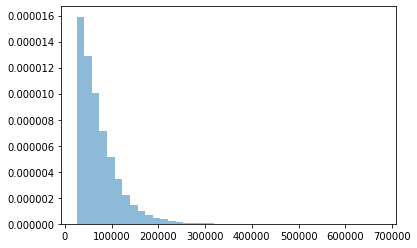

b'KIN_b_eta'
[-0.52606434 -1.93662786  0.78669751  1.266482   -0.20749924 -0.34123001
 -0.8713997   1.68809712 -0.72407758  1.56703579 -2.25492978 -1.52142465
 -0.86506438 -0.74311447  0.64397305 -0.64932019 -0.67088962  0.38505235
  0.81512952  1.816733  ]


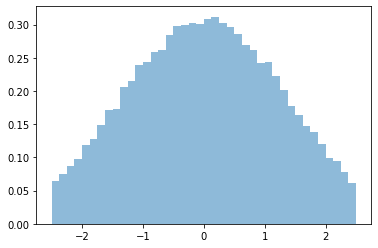

b'KIN_b_phi'
[ 1.06392336  0.21053742  2.19042802 -2.2066927   2.68371201  2.17698932
  2.29210925 -3.11555123  0.24465972 -1.43318307 -0.61051542  1.65287447
  2.74900723 -0.74179798  0.23972316 -0.34733576 -0.75786018 -1.86917174
 -2.0846343  -2.54256248]


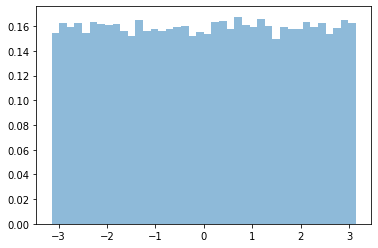

b'KIN_bbar_pt'
[ 51121.19140625 106912.15625     39960.44140625  42838.21875
 103515.3671875   50298.6640625  117815.765625    40852.9296875
  25187.57421875  70787.7421875   97265.1875      49064.8984375
  55925.84765625  57012.0625     115939.96875     92707.4375
  98341.265625    78181.375       76012.0703125   50548.703125  ]


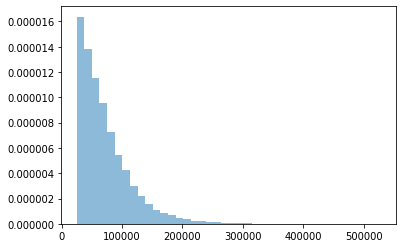

b'KIN_bbar_eta'
[-0.39797127 -1.69313335 -0.66325641  2.33697724 -0.18767986  1.85196829
  0.90656292  1.65133584  2.44831896 -0.78450817 -0.20654376 -0.81638306
 -0.88488579  0.34094685 -0.71187931  0.00299866 -0.30674934  0.58644164
 -1.52531207  1.06283581]


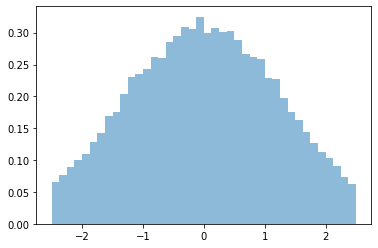

b'KIN_bbar_phi'
[-2.24426079  0.83397043 -2.47760439 -2.316787   -1.83301675 -2.67909765
 -2.74967194 -2.56100512  0.02389514  0.60949868 -2.6100893   2.32302809
 -2.45866299  1.19157326  0.68441194  0.38833991 -0.25176862  0.59600294
 -0.29618037  2.02846909]


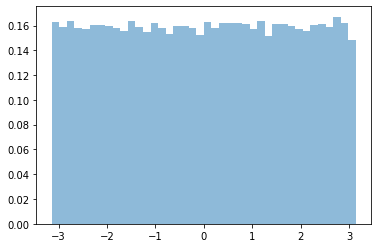

b'KIN_b_e'
[ 47839.30078125 468729.53125    173628.828125   122455.1328125
  76693.5        116475.9296875   56321.92578125  74907.3203125
  65829.3046875   94762.2578125  169488.828125    62038.3515625
  54420.171875   133619.890625    37176.53125    104905.9375
  50513.390625    62517.640625   183814.921875    87119.2421875 ]


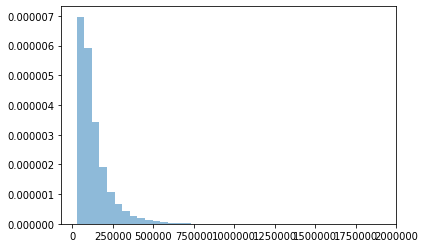

b'KIN_bbar_e'
[ 55708.359375   300694.6875      49670.65234375 223799.921875
 105942.109375   164279.46875    170049.203125   110721.953125
 146896.875       93912.265625   100059.015625    66758.5546875
  79747.5625      61049.140625   147438.25        93197.609375
 104102.875       92355.71875    183213.359375    82219.0078125 ]


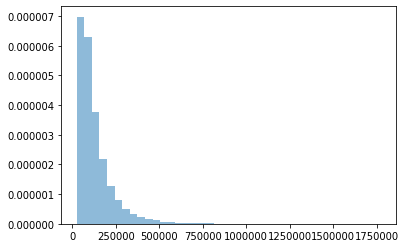

b'KIN_nu_pt'
[ 15976.84179688   8345.4921875   73534.3828125   57803.25
  34316.          41799.0859375   83523.7265625   59609.64453125
  88377.984375    37009.9609375   12669.10839844 102546.046875
  44752.32421875  28283.0390625  116558.4296875   61100.19140625
 102127.1953125   29494.16601562  37347.54296875  46009.01171875]


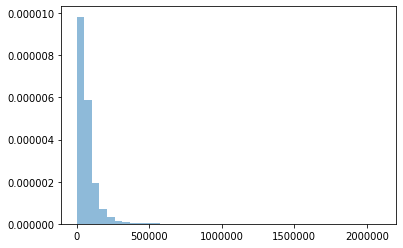

b'KIN_nu_eta'
[ 0.91115957  0.47605193  1.33516371  0.90865541  0.9653191   0.21987809
 -0.60156476 -0.14112276  0.41191882  0.34653115  0.02688826 -0.31857958
  1.4290241  -1.58840311 -0.41253167 -1.79346573 -1.21086133  1.99685538
 -0.24312969 -0.98720312]


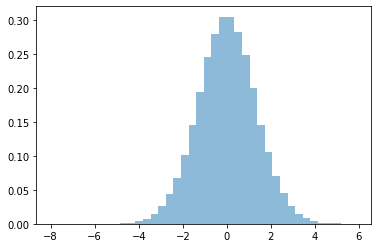

b'KIN_nu_phi'
[ 2.04955482 -1.17010689  0.67004228  1.91596866  2.30164933  1.471753
 -0.39066306  0.68804818 -2.18212295 -1.51852715 -1.29615605 -1.06728196
  3.09505486  1.44082093 -2.23996568  1.26171207  2.56778765  2.51440382
 -1.00499415  2.79642749]


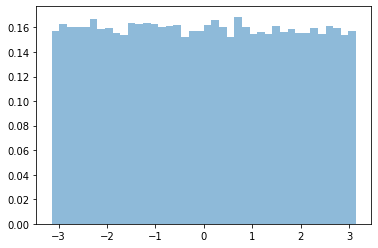

b'KIN_nubar_pt'
[ 38071.58203125  36611.796875    95976.859375    24672.95898438
  35013.22265625  44478.17578125  69138.9609375   50548.28515625
  56362.3828125   41493.25390625  42232.02734375  43844.6015625
  42259.42578125 171977.296875    64684.71875     32223.11132812
  18756.56640625  34850.8046875   42053.1015625   93896.65625   ]


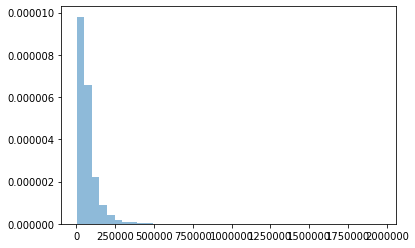

b'KIN_nubar_eta'
[-1.71211243 -1.23253214 -2.06052303  0.31638268 -1.48915064 -0.20866361
  0.6945743  -0.47702527  1.12657511  0.93871695  0.98954171  1.2729491
 -0.8352806   0.62933117 -1.62198234 -1.54166722  1.09764242  2.51014161
  0.24639897  0.06602256]


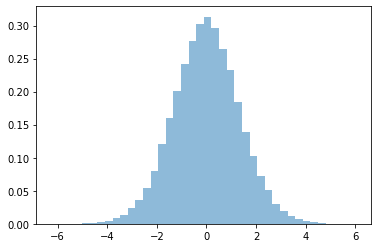

b'KIN_nubar_phi'
[ 1.60276055  0.43527412 -0.73963404  1.39919984 -0.65186548 -0.56794757
  2.44824123 -2.22439241  2.80537772  1.27054822 -2.17013121 -2.48582268
  1.15203226  2.67194128  1.5493989   0.70435596 -2.51698446 -1.45693636
 -1.6456672  -0.08413477]


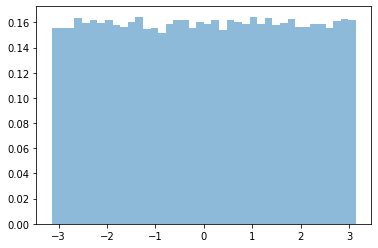

b'KIN_nu_e'
[ 23080.64648438   9309.13769531 149412.046875    83353.7421875
  51585.30078125  42813.58203125  99097.796875    60204.21484375
  95982.4609375   39254.43359375  12673.68847656 107794.0546875
  98772.0859375   72124.2421875  126617.984375   188696.609375
 186602.46875    110627.          38456.8359375   70309.484375  ]


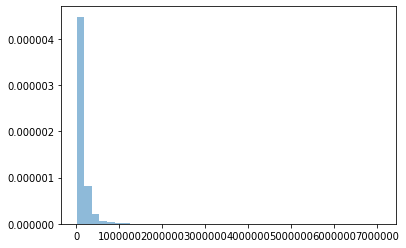

b'KIN_nubar_e'
[108906.3671875   68124.6171875  382825.84375     25918.15039062
  81561.4296875   45449.99609375  86497.796875    56409.3828125
  96075.7109375   61157.4921875   64651.921875    84430.9765625
  57878.796875   207172.75       170140.984375    78727.4609375
  31236.703125   215864.65625     43336.1484375   94101.375     ]


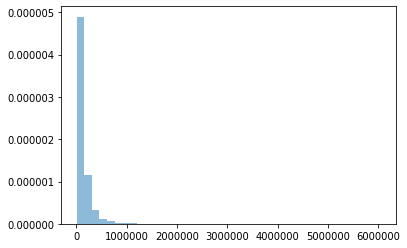

b'KIN_prob'
[0.07       0.26800001 0.838      0.18799999 0.63599998 0.60799998
 0.68199998 0.75199997 0.14399999 0.25799999 0.322      0.51200002
 0.64600003 0.034      0.60000002 0.75199997 0.46799999 0.84399998
 0.77200001 0.98199999]


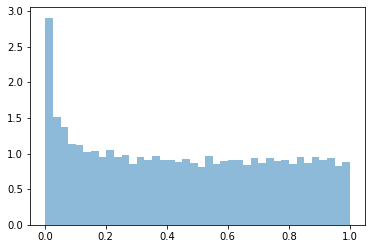

In [8]:
features_array = get_input_arrays(tree, features_list)

## optional check feature arrays
check_inputs = True

if check_inputs:
    for feature in features_list:
        print(feature)
        print(tree.array(feature)[:20])
        #plt.hist(tree1.array(feature),bins=40,density=True,alpha=.8)
        plt.hist(tree.array(feature),bins=40,density=True,alpha=.5)
        plt.show()
    #print("KIN and NW:")
    #plt.hist(KIN, bins=2)
    #plt.hist(NW, bins=2)

In [9]:
#features_array_KIN = features_array[np.where(target < 1.5)[0]]
#features_array_NW  = features_array[np.where(target > 1.5)[0]]

#features_array_SIM = features_array[np.where(abs(t_NWKIN) <  0.3)[0]]
#features_array_DIF = features_array[np.where(abs(t_NWKIN) >= 0.3)[0]]

#print(features_array_SIM.shape)
#print(features_array_SIM[0])
#print(features_array_DIF.shape)
#print(features_array_DIF[0])

In [10]:
"""
for i in range(len(features_array_KIN.shape[1])):
    _=plt.hist(features_array_KIN[:,i],bins=100,alpha=.5,density=True)
    _=plt.hist(features_array_NW[:,i],bins=100,alpha=.5,density=True)
    plt.show()

for i in range(features_array_SIM.shape[1]):
    print("observable: ", features_list[i])
    _=plt.hist(features_array_SIM[:,i],bins=100,alpha=.5,density=True)
    _=plt.hist(features_array_DIF[:,i],bins=100,alpha=.5,density=True) 
    plt.show()
"""

'\nfor i in range(len(features_array_KIN.shape[1])):\n    _=plt.hist(features_array_KIN[:,i],bins=100,alpha=.5,density=True)\n    _=plt.hist(features_array_NW[:,i],bins=100,alpha=.5,density=True)\n    plt.show()\n\nfor i in range(features_array_SIM.shape[1]):\n    print("observable: ", features_list[i])\n    _=plt.hist(features_array_SIM[:,i],bins=100,alpha=.5,density=True)\n    _=plt.hist(features_array_DIF[:,i],bins=100,alpha=.5,density=True) \n    plt.show()\n'

In [11]:
#labels = np.concatenate((SIM,DIF))
#data   = np.concatenate((features_array_SIM,features_array_DIF))
data = features_array

In [12]:
'''
weights = 1/(h * 1/np.max(h))
print(weights)
locs = np.digitize(target, b)
print("target:", target)
print("b:", b)
print("locs:",locs, "length of locs:", len(locs))
weights_array = np.zeros(len(target))
print(len(target))
for i in range(len(weights)):
    weights_array[np.where(locs == i+1)[0]] = weights[i]
#plt.hist(tree.array(feature),bins=40,density=True,alpha=.5)
#plt.show()
'''

'\nweights = 1/(h * 1/np.max(h))\nprint(weights)\nlocs = np.digitize(target, b)\nprint("target:", target)\nprint("b:", b)\nprint("locs:",locs, "length of locs:", len(locs))\nweights_array = np.zeros(len(target))\nprint(len(target))\nfor i in range(len(weights)):\n    weights_array[np.where(locs == i+1)[0]] = weights[i]\n#plt.hist(tree.array(feature),bins=40,density=True,alpha=.5)\n#plt.show()\n'

In [13]:
#plt.hist(target,bins=2)
#plt.hist(target,bins=2,weights=weights_array,alpha=.25)

### This scales the target in order for the ML to be successful

In [14]:
#spin_transformer = RobustScaler()
#spin_target_scaled = spin_transformer.fit_transform(target.reshape(-1,1))
#spin_target_scaled = (spin_target_scaled - np.min(spin_target_scaled))/(np.max(spin_target_scaled) - np.min(spin_target_scaled))
#print(spin_target_scaled.shape)

In [15]:
#features_array = get_input_arrays(tree, features_list)

In [16]:
#print(target[:10])
#print(weights_array[:10])

In [17]:
#np.where(np.isnan(features_array) == True)

In [18]:
transformer = RobustScaler()
features_array_scaled = transformer.fit_transform(data)
print(features_array_scaled.shape)

(76999, 82)


In [19]:
model = Sequential()
model.add(Dense(200, input_dim=len(features_list), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()
#model = multihead_model(features_list)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               16600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)               

In [21]:
def custom_loss(y_true, y_pred):
    
    return ((K.abs(y_pred) * 1.0) * keras.losses.logcosh(y_pred, y_true))
    #return (keras.losses.logcosh(y_pred, y_true))
def custom_loss_2(y_true, y_pred):
    
    return (y_true - y_pred)
    #return (keras.losses.logcosh(y_pred, y_true))

In [22]:
#model.compile(loss='logcosh', optimizer='adam', metrics=['mae', 'mse'])
#model.compile(loss=[custom_loss], optimizer='adam', metrics=['mae', 'mse',custom_loss_2])
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["binary_accuracy", custom_loss_2])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
#features_array_scaled, spin_target_scaled, weights_array = shuffle(features_array_scaled, spin_target_scaled, weights_array)
#selection1 = np.random.choice(np.where(labels == 0)[0],len(KIN),replace=False)
#selection2 = np.where(labels == 1)[0]
#selection = np.concatenate((selection1,selection2))
#features_array_scaled, labels, weights_array = shuffle(features_array_scaled[selection], labels[selection], weights_array[selection])

In [24]:
#X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(features_array_scaled, spin_target_scaled, weights_array, test_size=0.2)
#X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(features_array_scaled, labels, weights_array, test_size=0.2, shuffle=True)
#from keras.utils import to_categorical
print(labels)
#print("ctagorizing...")
#labels = to_categorical(labels)
#print(labels)
X_train, X_test, y_train, y_test = train_test_split(features_array_scaled, labels, test_size=0.2, shuffle=True)

[1 0 0 ... 1 0 1]


In [25]:
#print(spin_target_scaled[:10])
#print(w_train[:10])

In [26]:
#history = model.fit(X_train, y_train, epochs=600, batch_size=256, verbose=1, validation_split=.2, sample_weight=w_train)
history = model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=2, validation_split=.2)


Train on 49279 samples, validate on 12320 samples
Epoch 1/100
 - 1s - loss: 6.2186 - binary_accuracy: 0.5875 - custom_loss_2: -1.4139e-01 - val_loss: 0.6239 - val_binary_accuracy: 0.7029 - val_custom_loss_2: -4.8582e-02
Epoch 2/100
 - 1s - loss: 1.8968 - binary_accuracy: 0.6870 - custom_loss_2: -3.6051e-02 - val_loss: 0.5682 - val_binary_accuracy: 0.7029 - val_custom_loss_2: 0.0297
Epoch 3/100
 - 1s - loss: 1.1976 - binary_accuracy: 0.6919 - custom_loss_2: -5.6054e-03 - val_loss: 0.5523 - val_binary_accuracy: 0.6368 - val_custom_loss_2: 0.0484
Epoch 4/100
 - 1s - loss: 0.8583 - binary_accuracy: 0.6951 - custom_loss_2: 0.0084 - val_loss: 0.5396 - val_binary_accuracy: 0.6368 - val_custom_loss_2: 0.0554
Epoch 5/100
 - 1s - loss: 0.7448 - binary_accuracy: 0.6946 - custom_loss_2: 0.0142 - val_loss: 0.5301 - val_binary_accuracy: 0.6368 - val_custom_loss_2: 0.0542
Epoch 6/100
 - 1s - loss: 0.6453 - binary_accuracy: 0.6986 - custom_loss_2: 0.0141 - val_loss: 0.5134 - val_binary_accuracy: 0.70

Epoch 50/100
 - 1s - loss: 0.4436 - binary_accuracy: 0.7872 - custom_loss_2: -1.5347e-03 - val_loss: 0.4524 - val_binary_accuracy: 0.7901 - val_custom_loss_2: 0.0322
Epoch 51/100
 - 1s - loss: 0.4420 - binary_accuracy: 0.7882 - custom_loss_2: -1.5644e-03 - val_loss: 0.4554 - val_binary_accuracy: 0.7907 - val_custom_loss_2: 0.0352
Epoch 52/100
 - 1s - loss: 0.4425 - binary_accuracy: 0.7890 - custom_loss_2: -1.2887e-03 - val_loss: 0.4599 - val_binary_accuracy: 0.7908 - val_custom_loss_2: 0.0523
Epoch 53/100
 - 1s - loss: 0.4387 - binary_accuracy: 0.7901 - custom_loss_2: 1.3837e-04 - val_loss: 0.4579 - val_binary_accuracy: 0.7949 - val_custom_loss_2: 0.0486
Epoch 54/100
 - 1s - loss: 0.4374 - binary_accuracy: 0.7895 - custom_loss_2: -2.4342e-03 - val_loss: 0.4570 - val_binary_accuracy: 0.7923 - val_custom_loss_2: 0.0398
Epoch 55/100
 - 1s - loss: 0.4405 - binary_accuracy: 0.7891 - custom_loss_2: 8.4649e-04 - val_loss: 0.4650 - val_binary_accuracy: 0.7921 - val_custom_loss_2: 0.0562
Epoch 

Epoch 100/100
 - 1s - loss: 0.4123 - binary_accuracy: 0.8014 - custom_loss_2: -3.2424e-04 - val_loss: 0.4740 - val_binary_accuracy: 0.7980 - val_custom_loss_2: 0.0645


In [ ]:
model.save_weights('model_weights.h5')

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
'''
for i in range(1):
    plt.scatter(range(len(histories[i])), histories[i])
'''
#history_hist = plt.hist(history.history['loss'], bins=50)
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='training')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='validation')
plt.legend(fontsize=30)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('binary cross ent.', fontsize=20)
plt.title('Loss', fontsize=25)
plt.savefig('loss_wdeltas')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(model.evaluate(X_test, y_test))

In [ ]:

plt.hist(y_pred)
plt.hist(y_test,alpha=.5)

In [ ]:
#spin_transformer = RobustScaler()
#spin_target_scaled = spin_transformer.fit_transform(spin_target.reshape(-1,1))
#spin_target_scaled = (spin_target_scaled - np.min(spin_target_scaled))/(np.max(spin_target_scaled) - np.min(spin_target_scaled))
#print(spin_target_scaled.shape)

#transformer = RobustScaler()
#features_array_scaled = transformer.fit_transform(features_array)
#print(features_array_scaled.shape)

In [ ]:
y_pred_unscaled = y_pred*2 - 1
y_test_unscaled = y_test*2 - 1

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
a = y_pred_unscaled
b = y_test_unscaled
bins=np.histogram(np.hstack((a,b)), bins=10)[1]
h1,b1,_=plt.hist(a, bins, histtype='step', linewidth=2.5, label='Prediction', color='sandybrown')
h2,b2,_=plt.hist(b, bins, histtype='step', linewidth=2.5, label='truth level', color='steelblue')
plt.legend(fontsize=30)
plt.ylim(0,3000)
plt.xlabel(r'cos$\theta_{k}^{+}$cos$\theta_{k}^{-}$', fontsize=30)
plt.ylabel('Aribitrary Unit', fontsize=30)
#plt.savefig('truth_obs_arb')
plt.show()

In [ ]:
y_diff = y_test_unscaled - y_pred_unscaled
y_diff = y_diff[np.logical_not(np.isnan(y_diff))]
print(np.std((y_test_unscaled - y_pred_unscaled)))

In [ ]:
#print(h)
#tot_h1 = 0.0
#ent = 0.0
#for val in h1: 
#    tot_h1 += val
#for val in h1:
#    probh1 = val/tot_h1
#    if probh1 > 0.0:
#        ent += probh1*np.log(1/probh1)   
    #print(val/tot)
#print("entropy:",ent)
#print(b)
#for i in range(len(h1)):
    #print(h1[i]/tot_h1)
## KL divergence ##
KLdiv = 0.0
for i in range(len(h1)):
    #print("bin", i, h2[i]/tot_h)
    truth_prob = h2[i]/np.sum(h2)
    #print(val/len(a), ent)
    pred_prob = h1[i]/np.sum(h1)
    #pred_prob = 0.0
    if pred_prob == 0.0:
        pred_prob = 0.000001
    if truth_prob == 0.0:
        truth_prob = 0.000001
    KLdiv += truth_prob*(np.log(truth_prob) - np.log(pred_prob))
        #print(KLdiv)
        #KLdiv += (np.log(truth_prob) - np.log(pred_prob))
print(KLdiv)
#plt.annotate("test", (1,0.4))

fig, ax = plt.subplots(figsize=(20,10))
#plt.bar(range(len(h1)),h1/len(a),alpha=.4, color='sandybrown', label='Prediction from truth w deltas')
plt.bar(range(len(h1)),h1/len(a),alpha=.4, color='sandybrown', label='Prediction')
plt.bar(range(len(h2)),h2/len(b),alpha=.5, color='steelblue', label='truth level')
plt.legend(fontsize=30)
plt.xlabel(r'(bins of) cos$\theta_{k}^{+}$cos$\theta_{k}^{-}$', fontsize=30)
plt.ylabel('Probability', fontsize=30)

#plt.annotate("Kullback-Leibler divergence:", (.3,.94))
#plt.annotate("Kullback-Leibler divergence:", (.3,.94), fontsize=24)
#fig = plt.figure()
#text='''testt'''
#fig.text(.1,.1,text)
plt.text(0.14, 0.75,'KL div. = ', ha='right', va='center', transform=ax.transAxes, fontsize=24)
plt.text(0.15, 0.75,round(KLdiv,5), ha='left', va='center', transform=ax.transAxes, fontsize=24)

#plt.text(0.2, 0.8,'epochs = ', ha='right', va='center', transform=ax.transAxes, fontsize=24)
#plt.text(0.211, 0.8,'600', ha='left', va='center', transform=ax.transAxes, fontsize=24)

plt.savefig('probKL_wdeltas')
plt.show()
#print(h1/len(a))

## KL divergence ##
#KLdiv = 0.0
#for i in range(len(h1)):
#    truth_prob = h[i]/tot_h
#    #print(val/len(a), ent)
#    pred_prob = h1[i]/len(a)
#    if pred_prob > 0.0 and truth_prob > 0.0:
#        KLdiv += truth_prob*(np.log(truth_prob) - np.log(pred_prob))
#print(KLdiv)



In [ ]:
class make_hist_dicts:

    def correct_compare_hist(self,
        array1, array2, nBins=40, normed=False, gauss=False, logY=False
    ):
        array1_dict = {"hist":None, "binx":None, "weights":None, "binDx":None}
        array2_dict = {"hist":None, "binx":None, "weights":None, "binDx":None}

        array1 = self.removeNan(array1)
        array2 = self.removeNan(array2)

        if gauss is True:
            ratio = guassian_comparison_ratio(array1, array2, nBins)
        else:
            ratio = np.ones(nBins)
        
        hist1, bins1, hist2, bins2 = self.get_hists(array2, array1, nBins)
        
        stat = np.round(ks_2samp(plt.hist(array1, bins=nBins)[0], plt.hist(array2, bins=nBins)[0]), 4)
        plt.close()
        b1 = np.zeros(len(hist1))
        w1 = np.zeros(len(hist1))
        for i in range(len(hist1)):
            b1[i] = (bins1[i + 1] + bins1[i]) / 2
            w1[i] = bins1[i + 1] - bins1[i]
        b2 = b1
        w2 = w1
        
        array1_dict["binDx"] = w1
        array2_dict["binDx"] = w2
        
        array1_dict["hist"] = hist1
        array2_dict["hist"] = hist2
        
        array1_dict["binx"] = b1
        array2_dict["binx"] = b2
        
        hist1 = np.multiply(hist1, ratio)
        hist2 = np.multiply(hist2, ratio)

        weights1 = self.get_weights(array1, bins1, ratio)
        weights2 = self.get_weights(array2, bins2, ratio)
        
        array1_dict["weights"] = weights1
        array2_dict["weights"] = weights2

        if normed is False:
            scale1 = np.maximum(np.max(hist1), np.max(hist2))
            scale2 = scale1
        else:
            scale1 = np.max(hist1)
            scale2 = np.max(hist2)
        
        #error = hist2/len(array2)
        error = 1./hist2    
        fig, ax = plt.subplots(figsize=(16, 10))
        plt.cla()
        if logY is True:
            ax.set_yscale("log")
        ax.set_title("Regression Analysis - model 3, Batches", fontsize=35)
        ax.set_xlabel("kk", fontsize=24)
        ax.set_ylabel("Arbitraty Units", fontsize=24)
        plt.bar(b1, hist1 / scale1, width=w1, alpha=0.2, color="blue", label="Truth")
        plt.bar(b2, hist2 / scale2, width=w2, yerr=error, alpha=0.2, color="red", label="Prediction")
        plt.bar(
            b1,
            hist1 / scale1,
            width=w1,
            alpha=1.0,
            color="none",
            edgecolor="blue",
            linewidth=2.0,
        )
        plt.bar(
            b2,
            hist2 / scale2,
            width=w2,
            alpha=1.0,
            color="none",
            edgecolor="red",
            linewidth=2.0,
        )
        plt.annotate("Kolmogorov–Smirnov", (.7,.94), fontsize=24)
        plt.annotate("Statistic: "+str(stat[0]), (.75,.87), fontsize=24)
        plt.annotate("P-value: "+str(stat[1]), (.75,.80), fontsize=24)
        plt.legend(fontsize=24)
        plt.ylim(0,1.2)
        plt.show()
        
        return array1_dict, array2_dict, ratio

    def removeNan(self,array):
        if len(np.where(np.isnan(array) is True)) == 0:
            pass
        return array[np.logical_not(np.isnan(array))]

    def get_hists(self, array1, array2, nBins):

        """
        array1 = (
            2 * (array1 - np.min(array1)) / (np.max(array1) - np.min(array1)) - 1
        )
        array2 = (
            2 * (array2 - np.min(array2)) / (np.max(array2) - np.min(array2)) - 1
        )
        """

        hist1, bins1, _ = plt.hist(
            array2, color="blue", alpha=0.2, bins=nBins
        )  # , weights=true_z_w)
        plt.close()
        bins2 = bins1
        hist2 = np.zeros(len(hist1))

        # z_reg = np.multiply(test_z_torch.data.numpy().reshape(1000), test_z_w)
        # z_reg = test_z_torch.data.numpy().reshape(len(true_z))
        # z_reg = test_z_torch

        for i in range(len(hist1)):
            hist2[i] = len(
                np.where(array1[np.where((array1 <= bins1[i + 1]))[0]] > bins1[i])[0]
            )  # & (z_reg > bins1[i])[0])]))
            if i == len(hist1):
                hist2[i] = len(np.where(array1 >= bins1[i])[0])
        return hist1, bins1, hist2, bins2

    def get_weights(self, array, bins, ratio):

        weights = np.zeros(len(array))
        bins = np.digitize(array, bins)

        for i in range(len(ratio)):
            weights[np.where(bins == i)] = ratio[i]

        return weights

In [ ]:
y_y = spin_transformer.fit_transform(y_test.reshape(-1,1))
y_y = (y_y - np.min(y_y))/(np.max(y_y) - np.min(y_y))
comp = make_hist_dicts()
hist1, hist2, ratio = comp.correct_compare_hist(y_y, y_pred, nBins=10)